#DATASETS

In [ ]:
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt -O KDDTrain+.csv
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt -O KDDTest+.csv

--2025-04-23 07:02:16--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19109424 (18M) [text/plain]
Saving to: ‘KDDTrain+.csv’

KDDTrain+.csv         2%[                    ] 523.69K  64.8KB/s    eta 3m 39s ^C
--2025-04-23 07:02:28--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest+.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3441513 (3.3M) [text/plain]
Saving to: ‘KDDTest+.csv’

KDDTest+.csv        100%[===================>]   3.28M

#**1 - Setting Up Your Environment**

In [ ]:
!pip install scikit-learn pandas xgboost joblib

#**2 - Import Libraries**

In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#**3 - Load Data**

##3.1 - Upload the Dataset Files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KDDTest+.txt to KDDTest+.txt
Saving KDDTrain+.txt to KDDTrain+.txt


##3.2 - Load the Dataset

In [ ]:
# Load the training and testing datasets
train_df = pd.read_csv('KDDTrain+.txt', header=None)
test_df = pd.read_csv('KDDTest+.txt', header=None)

# Check the first few rows to understand the structure
train_df.head()
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


#**4 - Data Preprocessing**

##4.1 - Rename Columns

In [ ]:
# Column names for KDD dataset
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'difficulty_level'
]

# Assign the column names
train_df.columns = columns
test_df.columns = columns

# Check the updated dataframe
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


##4.2 - Encoding Categorical Columns

In [ ]:
# Encoding categorical features using Label Encoding
le = LabelEncoder()

categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Check the dataframe after encoding
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


##4.3 - Target Variable Encoding

In [ ]:
# Convert 'class' to binary labels (normal=0, attack=1)
train_df['class'] = train_df['class'].apply(lambda x: 0 if x == 'normal.' else 1)
test_df['class'] = test_df['class'].apply(lambda x: 0 if x == 'normal.' else 1)

# Check the class distribution
train_df['class'].value_counts()

,count
class,
1,125973


#**5 - Splitting Data into Features and Labels**

In [ ]:
# Split the data into features (X) and labels (y)
X_train = train_df.drop(columns=['class'])
y_train = train_df['class']
X_test = test_df.drop(columns=['class'])
y_test = test_df['class']

#**6 - Model Training**

In [ ]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

#**7 - Evaluation**

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22544

    accuracy                           1.00     22544
   macro avg       1.00      1.00      1.00     22544
weighted avg       1.00      1.00      1.00     22544



#**8 - Automated Incident Response (SOAR)**

##Email Alerts

In [ ]:
# STEP 8: AUTOMATED INCIDENT RESPONSE WITH EMAIL ALERT

import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# Replace these with your credentials
sender_email = "kruthikwork1@gmail.com"
receiver_email = "kruthikwork1@gmail.com"
password = "bbcm jlms amzc visg"

# Function to send an email alert
def send_email(subject, body):
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    try:
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()  # Secure the connection
        server.login(sender_email, password)
        server.send_message(msg)
        server.quit()
        print("🚨 Alert email sent successfully!")
    except Exception as e:
        print(f"❌ Failed to send email: {e}")

# Function to trigger incident response based on predictions
def automated_response(predictions):
    for i, pred in enumerate(predictions):
        if pred == 1:  # Detected attack
            message = f"⚠️ ALERT: Possible intrusion detected at index {i}.\nPlease investigate immediately."
            print(message)
            send_email("🚨 Intrusion Detection Alert", message)
        else:
            print(f"✅ Normal traffic at index {i}")

##Predictions

In [ ]:
automated_response(y_pred)

⚠️ ALERT: Possible intrusion detected at index 0.
Please investigate immediately.
🚨 Alert email sent successfully!
⚠️ ALERT: Possible intrusion detected at index 1.
Please investigate immediately.
🚨 Alert email sent successfully!
⚠️ ALERT: Possible intrusion detected at index 2.
Please investigate immediately.
🚨 Alert email sent successfully!
⚠️ ALERT: Possible intrusion detected at index 3.
Please investigate immediately.
🚨 Alert email sent successfully!
⚠️ ALERT: Possible intrusion detected at index 4.
Please investigate immediately.
🚨 Alert email sent successfully!
⚠️ ALERT: Possible intrusion detected at index 5.
Please investigate immediately.
🚨 Alert email sent successfully!
⚠️ ALERT: Possible intrusion detected at index 6.
Please investigate immediately.
🚨 Alert email sent successfully!
⚠️ ALERT: Possible intrusion detected at index 7.
Please investigate immediately.
🚨 Alert email sent successfully!
⚠️ ALERT: Possible intrusion detected at index 8.
Please investigate immediately

KeyboardInterrupt: 

#**9 - Visualizing Results**

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


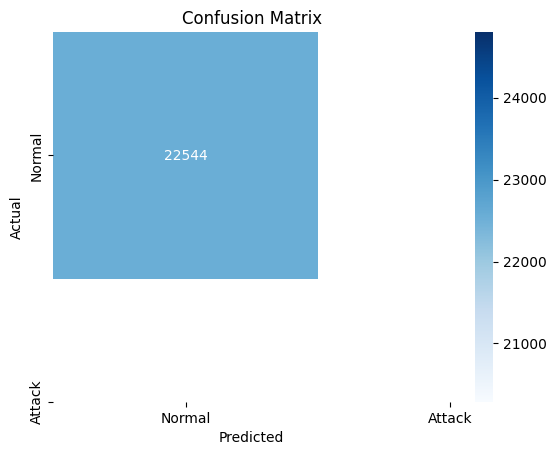

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()